# Retail Sales EDA and Spending Predictions with Python
This project focuses on analyzing retail sales data in Istanbul. It involves data preparation and cleaning, exploratory data analysis (EDA), and building predictive models to forecast customer spending based on various variables. Furthermore, the project explores the correlation between total revenue and currency rates.

## About Dataset
Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!

* invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.
* customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.
* gender: String variable of the customer's gender.
* age: Positive Integer variable of the customers age.
* category: String variable of the category of the purchased product.
* quantity: The quantities of each product (item) per transaction. Numeric.
* price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).
* payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.
* invoice_date: Invoice date. The day when a transaction was generated.
* shopping_mall: String variable of the name of the shopping mall where the transaction was made.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import squarify 
import warnings
import datetime as dt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv
/kaggle/input/usd-try-historical-data/USD_TRY Historical Data.csv


# Data preparation and cleaning 

In [2]:
#First we load the data
df = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
#Check information about columns, number of null entries and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
#Invoice date has wrong data type, we will fix it
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

#Also, we create new columns for year and month that can be useful for further analysis
df['year'] = df['invoice_date'].dt.strftime("%Y")
df['month'] = df['invoice_date'].dt.strftime("%m")

df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


In [5]:
# Get descriptive information about dataset
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
# Are there any duplicated rows?
df.duplicated().sum()

0

In [7]:
# Add new column total money spent, which will be useful later
df['total'] = df['price'] * df['quantity']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,242.40


In [8]:
# New column with age group
age_groups = [18, 24, 34, 44, 54, 64, 70]
labels = ['18-24','25-34','35-44','45-54','55-64','65-70']
df['age_group'] = pd.cut(df['age'],bins=age_groups, labels =labels)
age_cats = pd.CategoricalDtype(['18-24','25-34','35-44','45-54','55-64','65-70'], ordered=True)
df['age_group'] = df['age_group'].astype(age_cats)
df.head()

#Seems like now our data has all necessary columns, correct datatypes, no duplicates or 
#missing entires. And ready for further analysis

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month,total,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,08,7502.00,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12,5401.53,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11,300.08,18-24
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,05,15004.25,65-70
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10,242.40,45-54


# Exploratory data analysis

[Text(0.5, 1.0, 'Gender and number of transactions')]

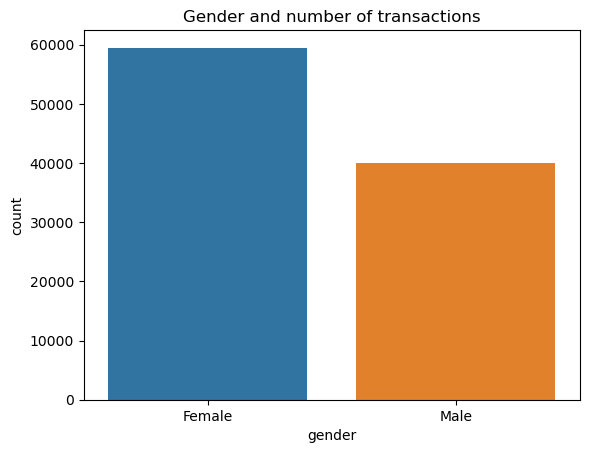

In [9]:
#First, investigate gender columns and see if we get some insights
sns.countplot(data=df,x='gender').set(title='Gender and number of transactions')

[Text(0.5, 1.0, 'Age distribution and number of transactions')]

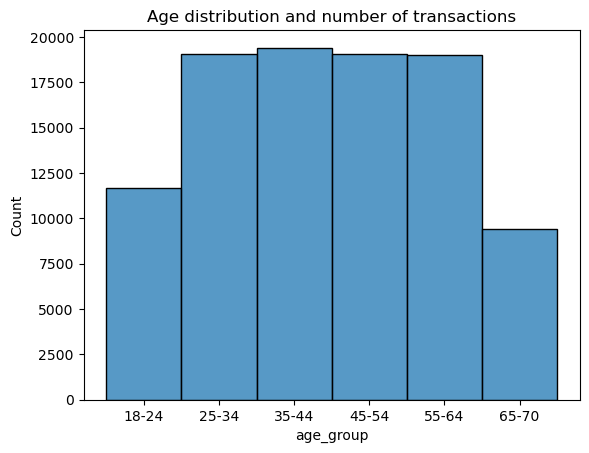

In [10]:
# Build histogram of age distribution per number of transactions
sns.histplot(data=df, x='age_group').set(title = 'Age distribution and number of transactions')

[Text(0.5, 1.0, 'Age group and total spent')]

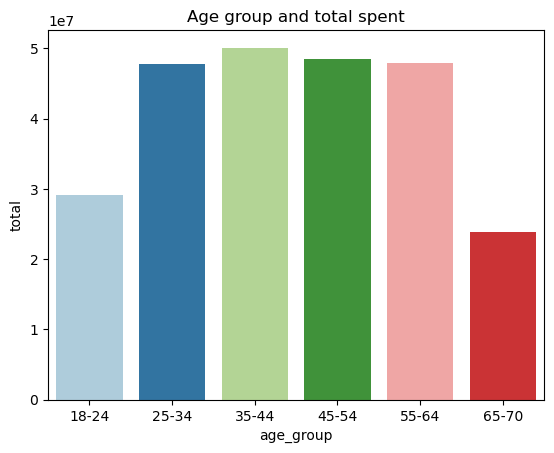

In [11]:
# Which age group spent more money?
age_group_total = df.groupby('age_group')['total'].sum().reset_index()
sns.barplot(data=age_group_total, x='age_group', y='total', palette = 'Paired').\
set(title='Age group and total spent')

Text(0.5, 1.0, 'Age distribution for females and males customers')

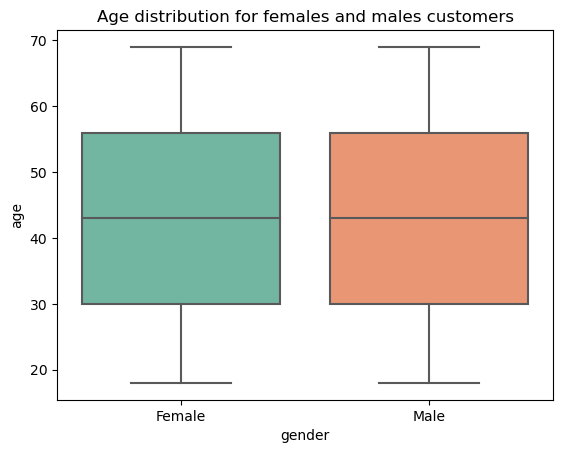

In [12]:
# Check age distribution among males and females
sns.boxplot(data=df, x='gender', y='age', palette='Set2')
plt.title('Age distribution for females and males customers')

[Text(0.5, 1.0, 'Payment method and number of transactions')]

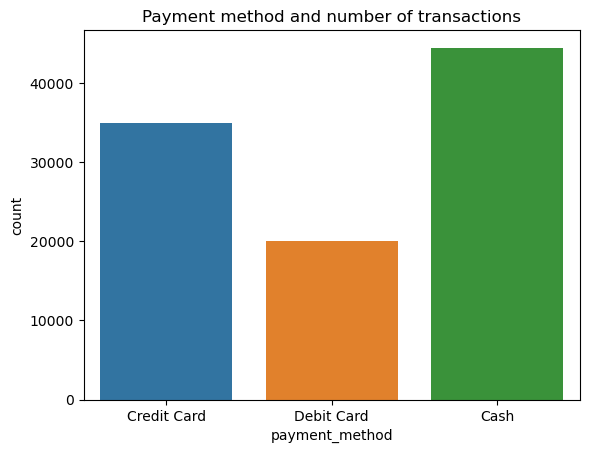

In [13]:
# Explore payment methods
sns.countplot(x='payment_method', data=df).set(title='Payment method and number of transactions')

In [14]:
# Most customers are paying by cash. But what about the amount of money spent and payment method?
df_payment = pd.DataFrame(df.groupby('payment_method')['total'].sum())
df_payment

,total
payment_method,
Cash,1.128322e+08
Credit Card,8.807712e+07
Debit Card,5.059643e+07


Text(0.5, 1.0, 'Price distribution')

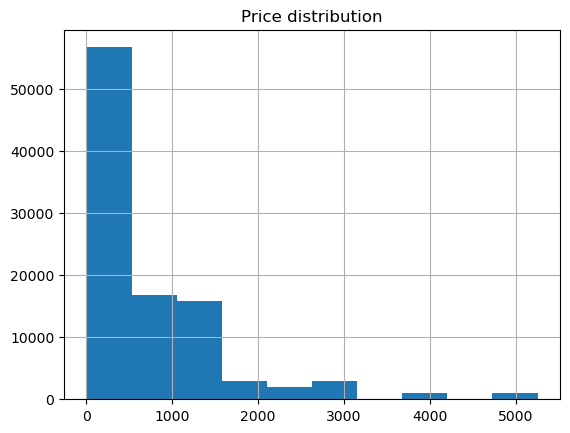

In [15]:
# Investigate which products price customers usually prefer
df.price.hist()
plt.title('Price distribution')

In [16]:
# Discover popular categories
df_category_count = df.groupby('category')['invoice_no'].count().reset_index()
df_category_count.sort_values(by='invoice_no', ascending=False)

,category,invoice_no
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


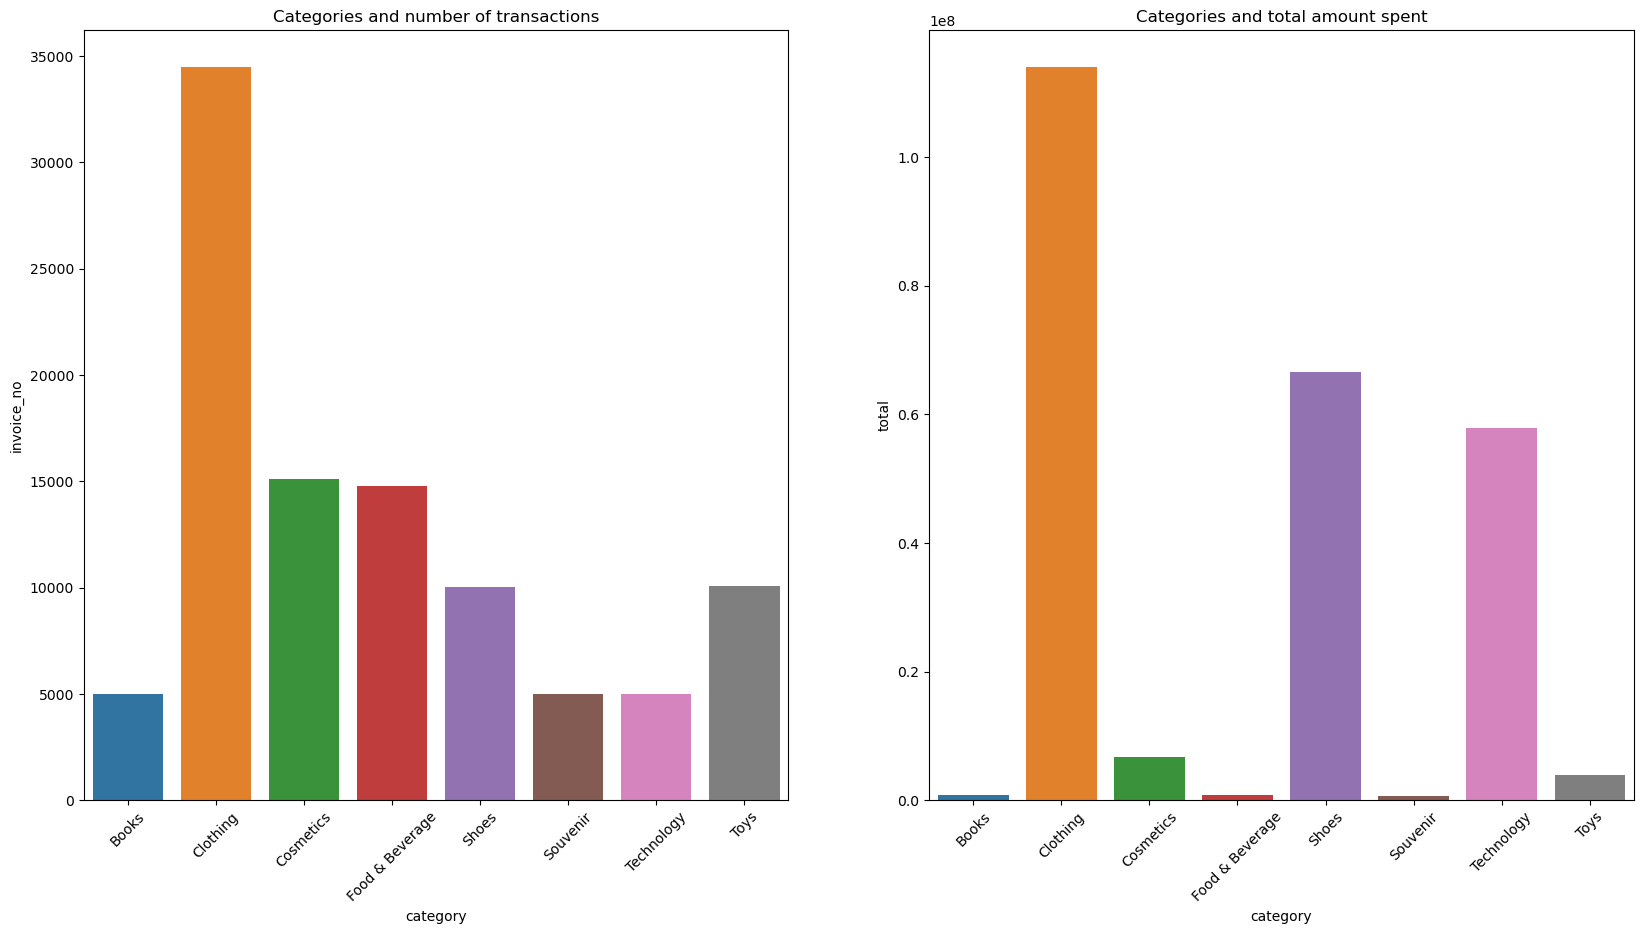

In [17]:
# Visualize popular categories per number of transactions and total amount spent
df_category_total = df.groupby('category')['total'].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.barplot(data=df_category_count, x='category', y='invoice_no', ax = ax1).set(title='Categories and number of transactions')
sns.barplot(data=df_category_total, x='category', y = 'total', ax = ax2).set(title='Categories and total amount spent')
ax1.tick_params('x', labelrotation=45)
ax2.tick_params('x', labelrotation=45)

In [18]:
# What is the average price per category?
avg_price_category = pd.DataFrame(df.groupby('category')['price'].mean().sort_values(ascending=False))
avg_price_category.columns = ['average_price']
avg_price_category

,average_price
category,
Technology,3156.935548
Shoes,1807.388568
Clothing,901.084021
Cosmetics,122.448626
Toys,107.733185
Books,45.568621
Souvenir,34.894345
Food & Beverage,15.671948


In [19]:
# Distribution number of transaction per age groups and gender
pd.crosstab([df.age_group, df.gender], df.category, values=df.invoice_no, aggfunc=(['count']))

count                                                    \
category         Books Clothing Cosmetics Food & Beverage Shoes Souvenir   
age_group gender                                                           
18-24     Female   326     2389      1024            1042   704      340   
          Male     255     1651       688             728   492      224   
25-34     Female   553     4010      1757            1644  1113      596   
          Male     388     2595      1154            1159   811      382   
35-44     Female   578     4039      1748            1787  1153      583   
          Male     364     2710      1164            1138   752      404   
45-54     Female   544     3924      1744            1674  1191      576   
          Male     412     2678      1186            1120   775      339   
55-64     Female   562     3983      1755            1653  1153      602   
          Male     418     2621      1174            1147   779      381   
65-70     Female   277     1921       877             849   552      264   
          Male     198     1320       559             554   388      200   

                                   
category         Technology  Toys  
age_group gender                   
18-24     Female        341   693  
          Male          218   537  
25-34     Female        594  1207  
          Male          371   747  
35-44     Female        606  1199  
          Male          434   742  
45-54     Female        561  1141  
          Male          398   786  
55-64     Female        552  1127  
          Male          351   745  
65-70     Female        275   620  
          Male          206   367

In [20]:
# How much did each combination of gender and age group spent in total in different categories?
pd.crosstab([df.age_group, df.gender], df.category, values=df.total, aggfunc=np.sum, normalize='columns').\
applymap(lambda x: "{0:.0f}%".format(100*x))

category         Books Clothing Cosmetics Food & Beverage Shoes Souvenir  \
age_group gender                                                           
18-24     Female    7%       7%        7%              7%    7%       7%   
          Male      6%       5%        4%              5%    5%       5%   
25-34     Female   12%      12%       12%             11%   11%      13%   
          Male      8%       8%        8%              8%    8%       8%   
35-44     Female   12%      12%       12%             13%   12%      12%   
          Male      7%       8%        8%              8%    8%       8%   
45-54     Female   10%      12%       11%             11%   12%      11%   
          Male      8%       8%        8%              8%    8%       7%   
55-64     Female   11%      12%       11%             11%   12%      12%   
          Male      9%       8%        8%              8%    8%       8%   
65-70     Female    6%       6%        6%              6%    6%       5%   
          Male      4%       4%        4%              4%    4%       4%   

category         Technology Toys  
age_group gender                  
18-24     Female         7%   7%  
          Male           4%   5%  
25-34     Female        11%  12%  
          Male           7%   7%  
35-44     Female        13%  12%  
          Male           9%   7%  
45-54     Female        11%  11%  
          Male           8%   8%  
55-64     Female        12%  12%  
          Male           7%   8%  
65-70     Female         6%   6%  
          Male           4%   4%

In [21]:
# The most popular shopping malls by number of transactions
pd.DataFrame(df['shopping_mall'].value_counts())


,shopping_mall
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914
Emaar Square Mall,4811


(0.0, 100.0, 0.0, 100.0)

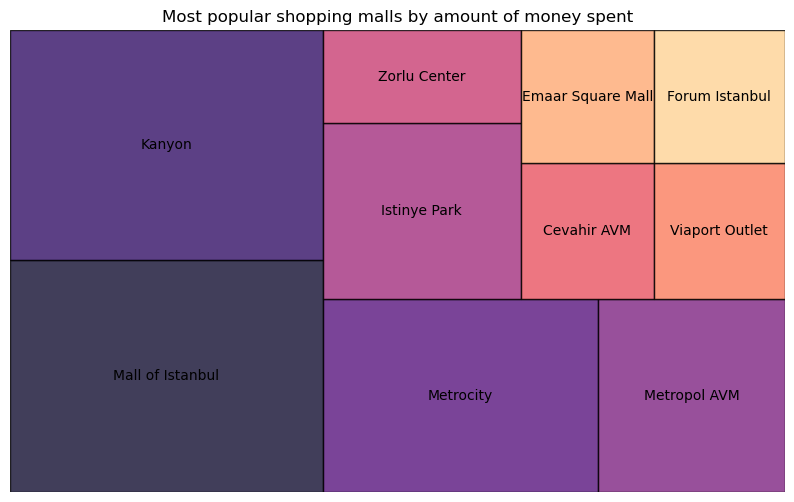

In [22]:
# And which shopping mall has the biggest amount of money spent? Lets visualize it
malls = df.groupby('shopping_mall')['total'].sum().reset_index().sort_values(by='total', ascending=False)
plt.figure(figsize=(10,6))
squarify.plot(sizes=malls['total'], label=malls['shopping_mall'], alpha=.8, color=sns.color_palette("magma", 
                                     len(malls)), ec='black' )
plt.title('Most popular shopping malls by amount of money spent')
plt.axis('off')

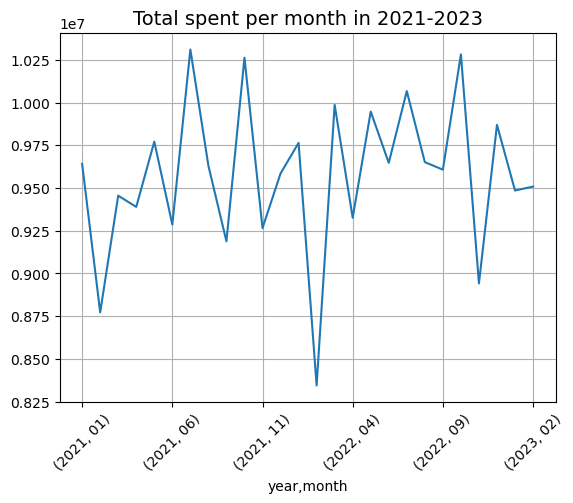

In [23]:
# Interesting to see how the total amount of money spent changed per year
# But we will not include data from March 2023 since it is not full (only till the 8th of March available) 
year_month = df[df['invoice_date'] < '2023-03-01'].groupby(['year', 'month'])['total'].sum()
year_month.plot(grid=True)
plt.title('Total spent per month in 2021-2023', size=14)
plt.tick_params('x', labelrotation=45)


# Summary 
* After our analysis, we can say that females at the age of 35-44, 45-54 spent the most amount of money(compare to other ages and gender groups) in the shopping malls and also as per number of transactions (how often they come to the mall).
* Customers prefer cheap products, in the 0-1000 TL range.
* The most popular categories as per the number of transactions: Clothing, Cosmetics, Food and beverages. However, as per total spending: Clothing, Shoes and Technology. 
* The most popular shopping malls are Mall of Istanbul, Kanyon, and Metrocity. 

The total monthly sales of shopping malls in Istanbul were not stable during the last 3 years, however, we can see dropped down in 2023. 
So, as a suggestion, business owners can run social media campaigns (or any other form of advertisement) targeting females between the age of 35-54 for the categories Clothing, Shoes, and Technology. 

# Customers total spending prediction

Next section we will do a customer spending prediction model that can be used for total revenue prediction in case business owners would run an advertisement campaign targeting certain customer profiles. 

In [24]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [25]:
# Choose relevant columns for predictions
df_model = df[['gender', 'age_group', 'category', 'price', 'total']]

#Get dummy data
df_dum = pd.get_dummies(df_model)
df_dum.head()

,price,total,gender_Female,gender_Male,age_group_18-24,age_group_25-34,age_group_35-44,age_group_45-54,age_group_55-64,age_group_65-70,category_Books,category_Clothing,category_Cosmetics,category_Food & Beverage,category_Shoes,category_Souvenir,category_Technology,category_Toys
0,1500.40,7502.00,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1800.51,5401.53,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,300.08,300.08,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3000.85,15004.25,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,60.60,242.40,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [26]:
# Train test split
X = df_dum.drop('total', axis =1)
y = df_dum.total.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)


In [28]:
# Decission tree
dt = DecisionTreeRegressor(max_depth=5,min_samples_split=6,max_leaf_nodes=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_mae = mean_absolute_error(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)


In [29]:
# Neural network
nn = MLPRegressor(hidden_layer_sizes=(50, 50))
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

nn_mae = mean_absolute_error(y_test, nn_pred)
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)


In [30]:
# Compare perfomence of the models
print('Linear Regression - MAE:', lr_mae, 'MSE:', lr_mse, 'R-squared:', lr_r2)
print('Decision Tree - MAE:', dt_mae, 'MSE:', dt_mse, 'R-squared:', dt_r2)
print('Neural Network - MAE:', nn_mae, 'MSE:', nn_mse, 'R-squared:', nn_r2)

Linear Regression - MAE: 362.4162959938693 MSE: 338258.4001978022 R-squared: 0.9808539985902585
Decision Tree - MAE: 330.85374303243003 MSE: 223483.50124668566 R-squared: 0.987350453300137
Neural Network - MAE: 48.294645230858784 MSE: 9899.614167683607 R-squared: 0.9994396649818614


In [31]:
# Cross validation
print(np.mean(cross_val_score(lr,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
print(np.mean(cross_val_score(dt,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
print(np.mean(cross_val_score(nn,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

-368.41138823702454
-330.6640379687242
-81.49173974277714


The neural network has better performance than other models. So we can take it for further predictions of total revenue, using as an input targeted customers profile(gender, age group, category of purchases products).


# Currency rate vs total revenue analysis and prediction
Would be interesting to investigate how US dollar to Turkish Lira rate affects the total revenue. And build a predictive model based on that correlation hence it can help business owners with planning.

In [32]:
# Load dataset
usd_try = pd.read_csv('/kaggle/input/usd-try-historical-data/USD_TRY Historical Data.csv', parse_dates=['Date'])

# Choose relevant columns
usd_try = usd_try[['Date', 'Price']]
usd_try.columns = ['date', 'rate']
usd_try.head()

,date,rate
0,2023-03-08,18.9478
1,2023-03-07,18.9243
2,2023-03-06,18.8955
3,2023-03-03,18.8288
4,2023-03-02,18.8908


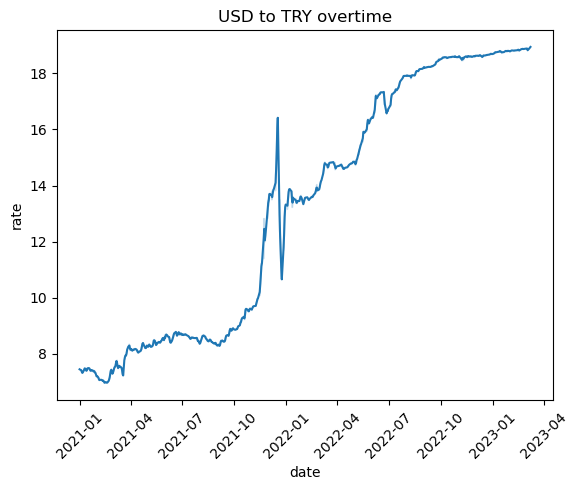

In [33]:
# Visualize rate change over time
sns.lineplot(data=usd_try, x='date', y='rate')
plt.title('USD to TRY overtime')
plt.tick_params('x', labelrotation=45)

In [34]:
# Prepare customers data dataset
daily_total = pd.DataFrame(df.groupby('invoice_date')['total'].sum().reset_index())
daily_total.head()

,invoice_date,total
0,2021-01-01,271192.66
1,2021-01-02,303659.14
2,2021-01-03,375794.99
3,2021-01-04,284512.26
4,2021-01-05,308395.08


In [35]:
# Merge datasets
merged = pd.merge(daily_total, usd_try, left_on='invoice_date', right_on='date', how='inner')
merged.head()

,invoice_date,total,date,rate
0,2021-01-01,271192.66,2021-01-01,7.4392
1,2021-01-03,375794.99,2021-01-03,7.4184
2,2021-01-04,284512.26,2021-01-04,7.3844
3,2021-01-04,284512.26,2021-01-04,7.4248
4,2021-01-05,308395.08,2021-01-05,7.3019


In [36]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1055 entries, 0 to 1054
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_date  1055 non-null   datetime64[ns]
 1   total         1055 non-null   float64       
 2   date          1055 non-null   datetime64[ns]
 3   rate          1055 non-null   float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 41.2 KB


In [37]:
merged.describe()

,total,rate
count,1055.000000,1055.000000
mean,317808.473081,13.004590
std,53818.761298,4.425645
min,172961.560000,6.953200
25%,277019.190000,8.481850
50%,314895.850000,13.561100
75%,353505.380000,17.927500
max,534906.860000,18.947800


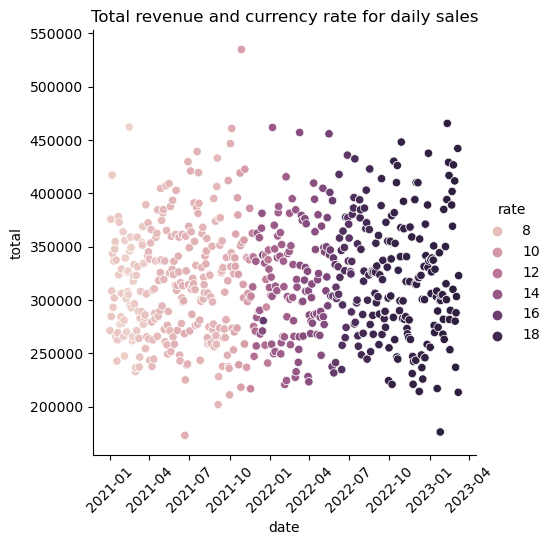

In [38]:
# Plot relationship between total revenue and currency rate
sns.relplot(data=merged, x='date', y='total', hue='rate')
plt.title('Total revenue and currency rate for daily sales')
plt.tick_params('x', labelrotation=45)

In [39]:
# Find correlation between total revenue and rate
merged.corr()

,total,rate
total,1.000000,0.038149
rate,0.038149,1.000000


Surprisingly, total revenue is not correlated with the currency rate. Meaning, there is no point in building a predictive model based on that. 

### Thank you for reading!